# Clustering avec K-Means

Dans un premier temps j'importe les libraires pour ce projet.
J'utilise KMeans de la librairie scikit-learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.model_selection import KFold

Génération de donnée à l'aide de la fonction make_blobs de scikit-learn. Ces données sont utilisées pour illustrer le processus de clustering.

In [2]:
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

Recherche du nombre optimal de clusters avec la méthode du coude

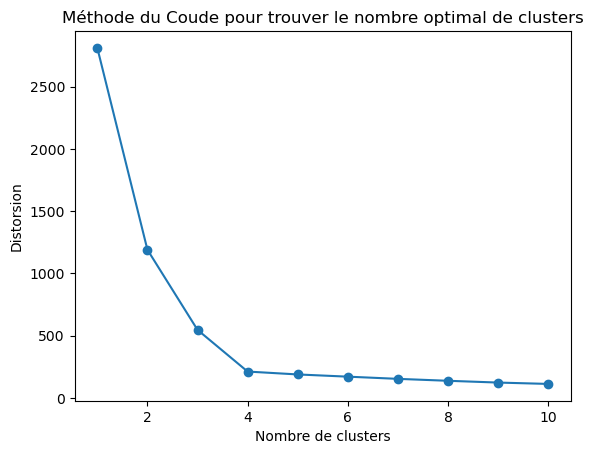

In [3]:
def find_optimal_clusters(X, max_clusters=10):
    distortions = []
    for i in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=i, n_init=10)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)
    plt.plot(range(1, max_clusters+1), distortions, marker='o')
    plt.xlabel('Nombre de clusters')
    plt.ylabel('Distorsion')
    plt.title("Méthode du Coude pour trouver le nombre optimal de clusters")
    plt.show()

find_optimal_clusters(X)

Entraînement du modèle K-Means

In [4]:
n_clusters = 4 
kmeans = KMeans(n_clusters=n_clusters, n_init=10)
kmeans.fit(X)

labels = kmeans.labels_

Création de donnée de test

In [5]:
clients = np.array([[2, 2], [0, 4], [1, 3], [3, 2]])

client_clusters = kmeans.predict(clients)

Prédiction des clusters

In [6]:
for i, (cluster, client) in enumerate(zip(client_clusters, clients)):
    print(f"Client {i+1} est dans le cluster {cluster} - Recommandation : Produit {chr(65 + cluster)}")

silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

Client 1 est dans le cluster 2 - Recommandation : Produit C
Client 2 est dans le cluster 3 - Recommandation : Produit D
Client 3 est dans le cluster 3 - Recommandation : Produit D
Client 4 est dans le cluster 2 - Recommandation : Produit C
Silhouette Score: 0.6819938690643478


Illustration des résultats

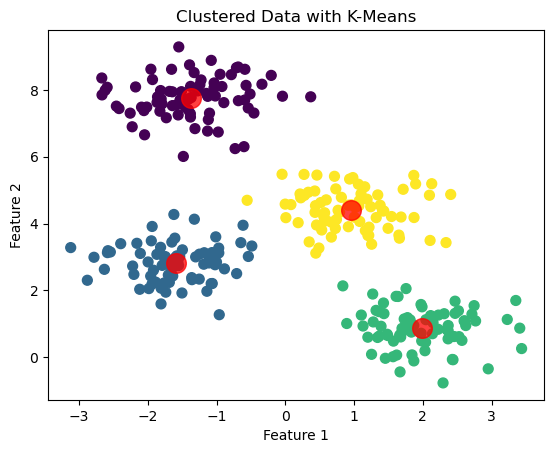

In [7]:
centers = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustered Data with K-Means')
plt.show()

Évaluation de la performance.
Validation croisée.

In [8]:
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

cluster_stability_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    
    kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
    kmeans.fit(X_train)
    
    labels_pred = kmeans.predict(X_test)
    
    silhouette_score_test = silhouette_score(X_test, labels_pred)
    
    cluster_stability_scores.append(silhouette_score_test)

mean_silhouette_score = np.mean(cluster_stability_scores)
std_silhouette_score = np.std(cluster_stability_scores)

print(f"Moyenne des scores de cohérence des clusters : {mean_silhouette_score}")
print(f"Écart type des scores de cohérence des clusters : {std_silhouette_score}")

Moyenne des scores de cohérence des clusters : 0.6798004209921695
Écart type des scores de cohérence des clusters : 0.016550360257903587
